In [1]:
# Display plots in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Common imports
import numpy as np
import pylab as pl
import pandas as pd
import geopandas as gp
import csv
import shapely
from fiona import crs

In [3]:
# Make plots prettyful
pl.style.use('fivethirtyeight')

In [4]:
shp = gp.GeoDataFrame.from_file('../data/shapefile/nycb2010.shp')
shp['BoroCode'] = shp['BoroCode'].astype(int)
tracts = shp.groupby(['BoroCode', 'CT2010'])

ids = []
geo = []

counties = [None, '061', '005', '047', '081', '085']

for (borocode, tract_id), b in tracts:
    ids.append(counties[borocode] + tract_id)
    geo.append(shapely.ops.cascaded_union(b['geometry']))
    
tracts_shp = gp.GeoDataFrame({'h_county_tract': ids, 'geometry': geo})

Either a polygon with interior rings, or a polygon with less than 4 points,
or a non-Polygon geometry.  Return arguments as a collection.

Either a polygon with interior rings, or a polygon with less than 4 points,
or a non-Polygon geometry.  Return arguments as a collection.



In [5]:
commute = pd.read_csv('../data/csv/tract_commute_summary.csv', dtype={'h_county_tract': str})

In [6]:
merged = tracts_shp.merge(commute, on='h_county_tract')

In [7]:
merged['time_rank'] = '1 Hour or More'
for i in [60, 45, 30, 15]:
    merged['time_rank'][merged['average_commute_time'] < (60*i)] = '%s Minutes' % i

c:\Users\Jeremy\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


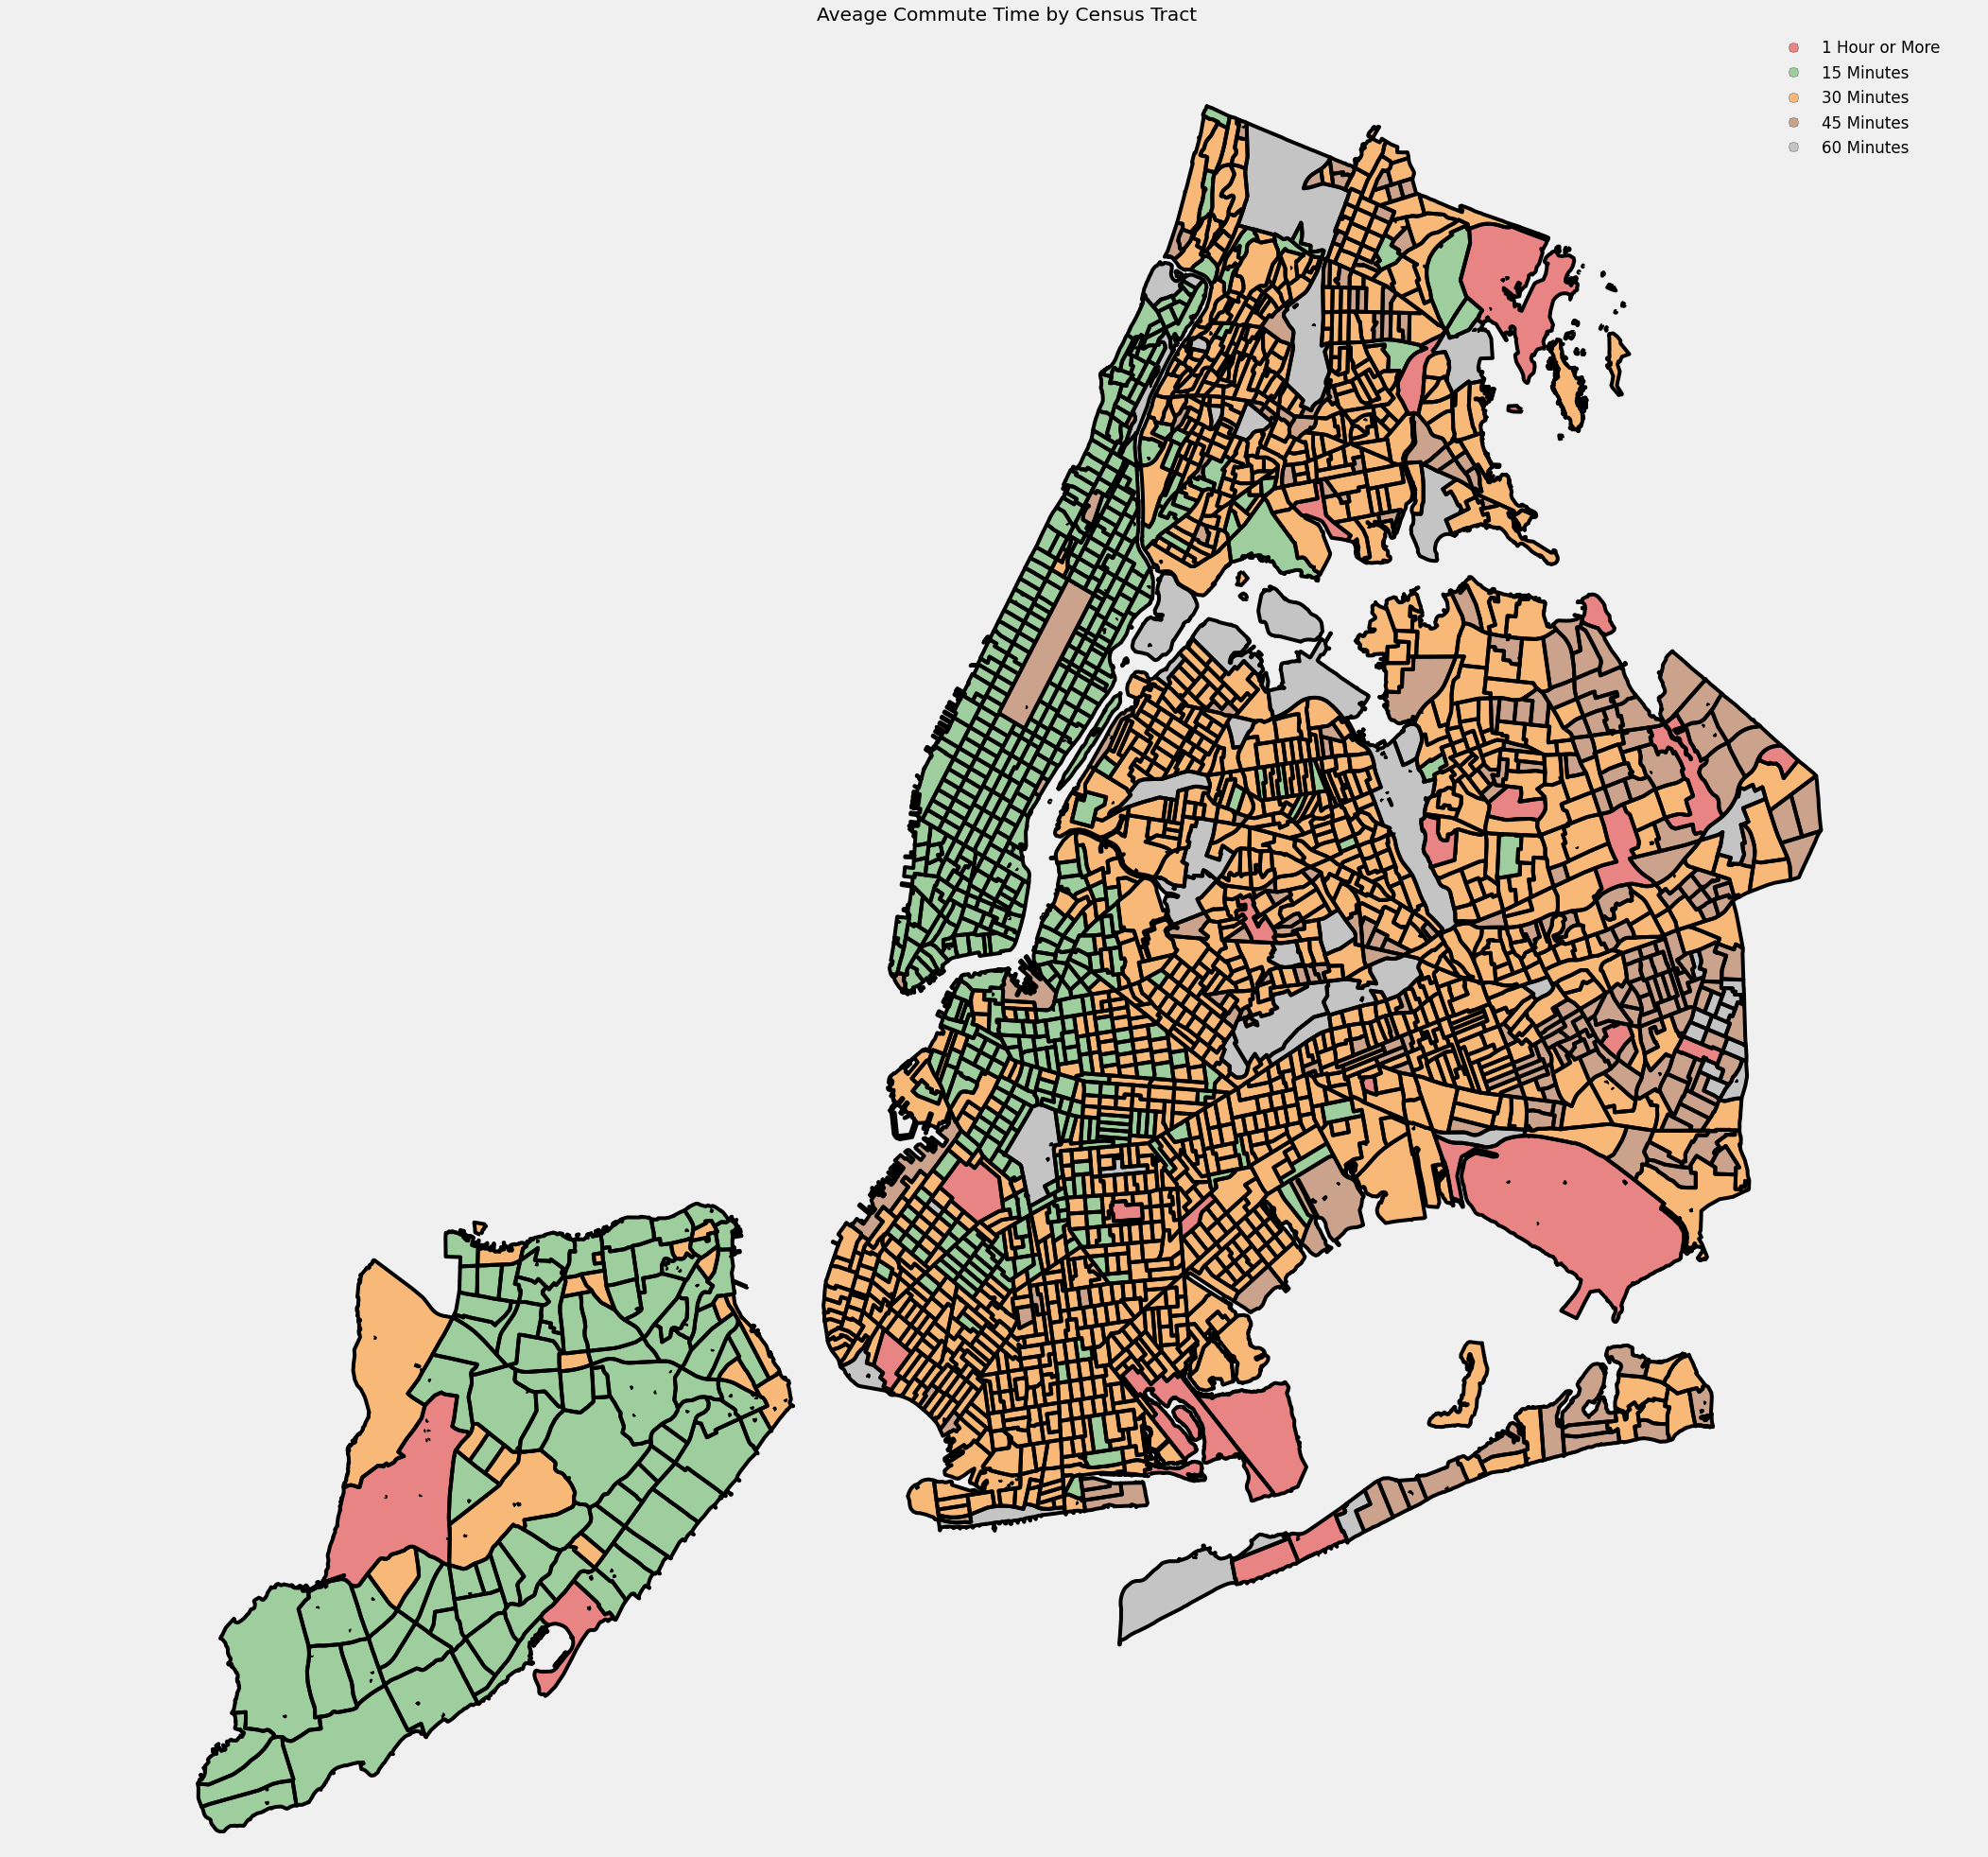

In [8]:
figure, ax = pl.subplots(figsize=(32,32))
ax.axis('off')
merged.plot(axes=ax, column='time_rank', legend=True, categorical=True)
ax.set_title('Aveage Commute Time by Census Tract')

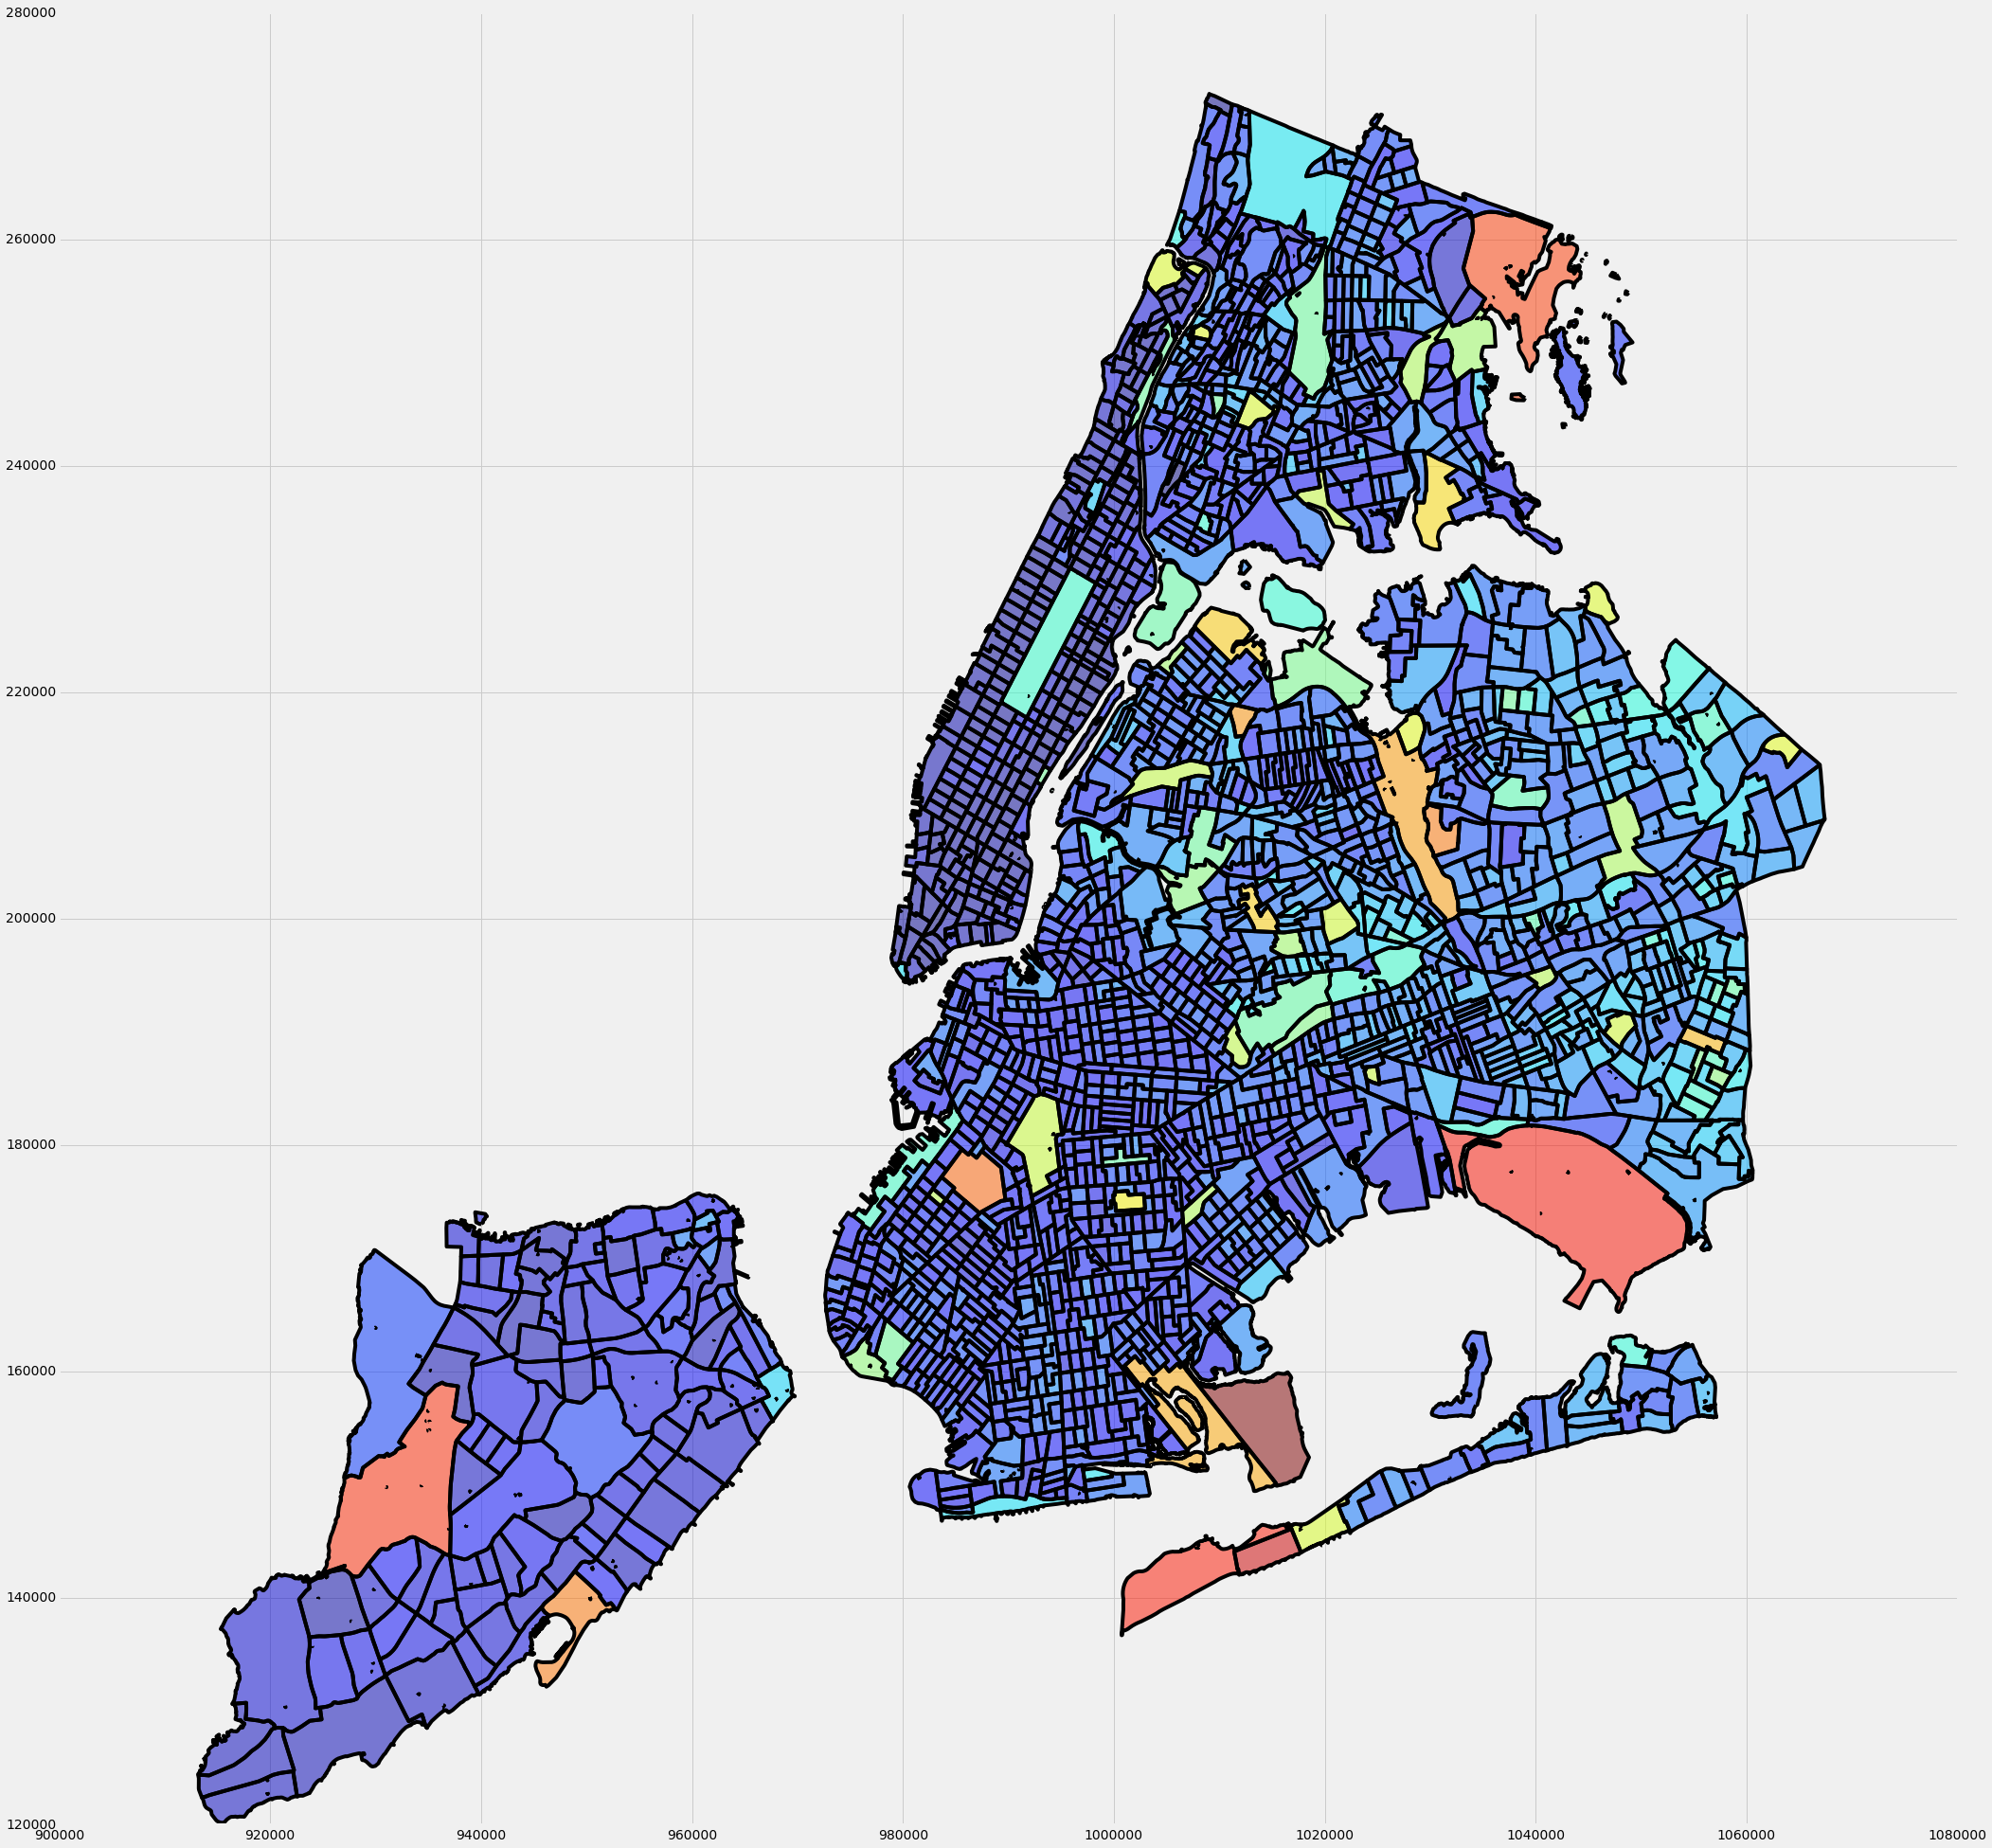

In [9]:
figure, ax = pl.subplots(figsize=(32,32))
merged.plot(axes=ax, column='average_walk_distance')